In [ ]:
# ============================================================================
# STEP 1: Install Required Libraries
# ============================================================================
# Fix numpy compatibility issue with pmdarima
!pip uninstall numpy -y -q
!pip install numpy==1.23.5 -q
!pip install pmdarima --no-build-isolation -q
!pip install prophet statsmodels matplotlib seaborn -q

print("All libraries installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 100.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 109.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.6 MB/s eta 0:00:00
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Libraries installed successfully!


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7824cdf38f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

LOADING DATA


Saving household_power_consumption.txt to household_power_consumption.txt

Dataset Shape: (200000, 8)

First few rows:
             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                3.873                  0.025  228.251   
1 2006-12-16 17:24:01                4.093                  0.892  222.608   
2 2006-12-16 17:24:02                0.653                  0.233  238.061   
3 2006-12-16 17:24:03                4.238                  0.420  233.476   
4 2006-12-16 17:24:04                4.577                  0.160  232.678   

   Global_intensity  Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             1.697               7              4             3.0  
1             1.839              13              1             0.0  
2             0.274              17              6            20.0  
3             1.815               8             25             0.0  
4             1.967               8              4             6.0 

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 28.

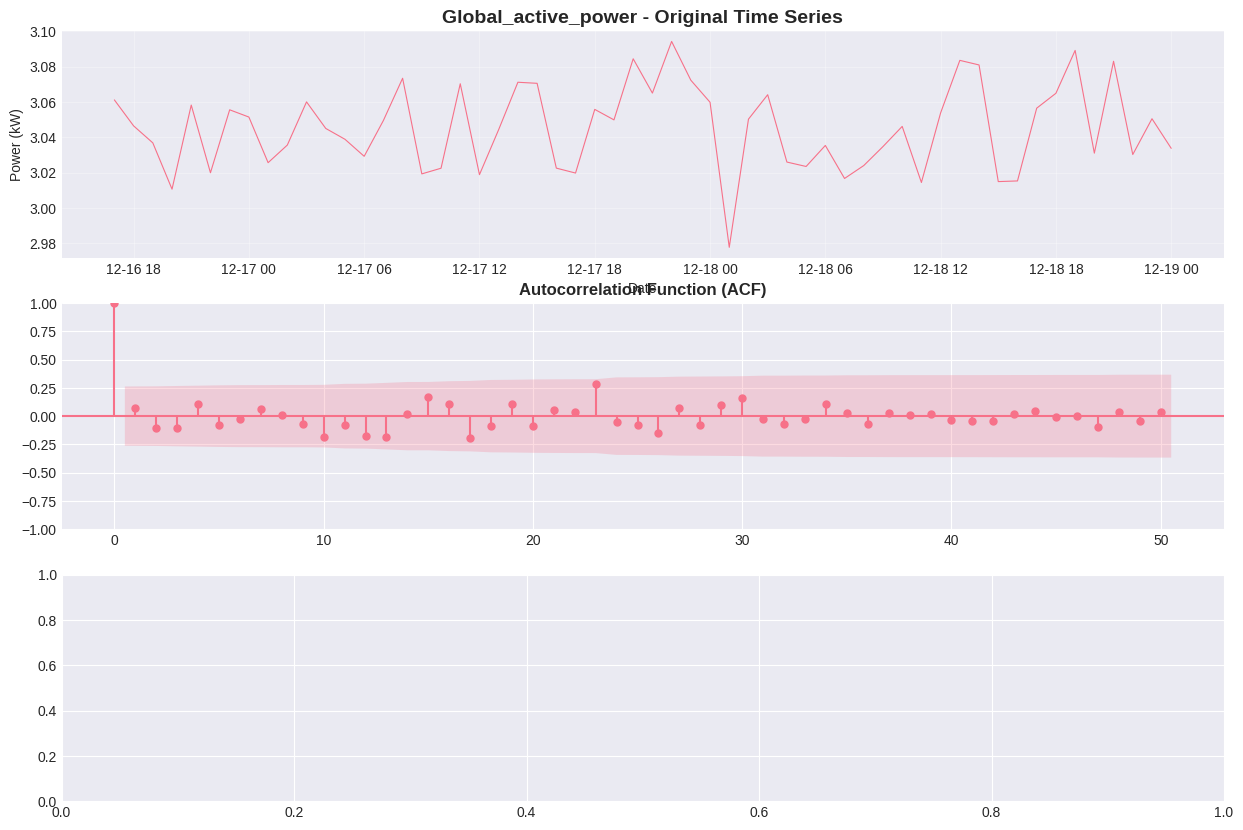

In [ ]:
# Time Series Forecasting with ARIMA, SARIMA, and Prophet
# For Household Power Consumption Data

# ============================================================================
# STEP 1: Install Required Libraries
# ============================================================================
# Install libraries (using statsforecast as alternative to pmdarima)
!pip install statsforecast prophet statsmodels matplotlib seaborn scikit-learn -q

import sys
print("Python version:", sys.version)
print("\nLibraries installed successfully!")

# ============================================================================
# STEP 2: Import Libraries
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Time series libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA as StatsAutoARIMA
from prophet import Prophet

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# STEP 3: Load and Prepare Data
# ============================================================================
print("=" * 80)
print("LOADING DATA")
print("=" * 80)

# Upload your CSV file in Colab
from google.colab import files
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the CSV with semicolon delimiter
df = pd.read_csv(filename, sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                 dayfirst=True)

# Display basic info
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

# ============================================================================
# STEP 4: Data Preprocessing
# ============================================================================
print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Handle missing values (replace '?' with NaN and forward fill)
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(method='ffill')

# Resample to hourly data (aggregating by mean)
df_hourly = df.resample('H').mean()

# Focus on Global_active_power as our target variable
target_col = 'Global_active_power'
ts_data = df_hourly[[target_col]].dropna()

print(f"\nResampled to hourly data: {ts_data.shape}")
print(f"Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print(f"\nBasic statistics:")
print(ts_data.describe())

# ============================================================================
# STEP 5: Visualize Time Series
# ============================================================================
print("\n" + "=" * 80)
print("TIME SERIES VISUALIZATION")
print("=" * 80)

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Original series
axes[0].plot(ts_data.index, ts_data[target_col], linewidth=0.8)
axes[0].set_title(f'{target_col} - Original Time Series', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Power (kW)')
axes[0].grid(True, alpha=0.3)

# ACF
plot_acf(ts_data[target_col], lags=50, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF)', fontsize=12, fontweight='bold')

# PACF
plot_pacf(ts_data[target_col], lags=50, ax=axes[2])
axes[2].set_title('Partial Autocorrelation Function (PACF)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Seasonal decomposition
print("\nPerforming seasonal decomposition...")
decomposition = seasonal_decompose(ts_data[target_col], model='additive', period=24)

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=axes[0], title='Observed', linewidth=0.8)
decomposition.trend.plot(ax=axes[1], title='Trend', linewidth=0.8)
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', linewidth=0.8)
decomposition.resid.plot(ax=axes[3], title='Residual', linewidth=0.8)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 6: Train-Test Split
# ============================================================================
print("\n" + "=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)

# Use 80% for training, 20% for testing
train_size = int(len(ts_data) * 0.8)
train = ts_data[:train_size]
test = ts_data[train_size:]

print(f"Training set: {len(train)} observations ({train.index.min()} to {train.index.max()})")
print(f"Test set: {len(test)} observations ({test.index.min()} to {test.index.max()})")

# ============================================================================
# STEP 7: ARIMA Model
# ============================================================================
print("\n" + "=" * 80)
print("ARIMA MODEL")
print("=" * 80)

# Fit ARIMA model (p, d, q) - using common values
print("\nFitting ARIMA(2,1,2) model...")
arima_model = ARIMA(train[target_col], order=(2, 1, 2))
arima_fit = arima_model.fit()

print("\nARIMA Model Summary:")
print(arima_fit.summary())

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))
arima_forecast = pd.Series(arima_forecast, index=test.index)

# Calculate metrics
arima_mae = mean_absolute_error(test[target_col], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test[target_col], arima_forecast))
arima_r2 = r2_score(test[target_col], arima_forecast)

print(f"\nARIMA Performance:")
print(f"MAE: {arima_mae:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"R² Score: {arima_r2:.4f}")

# ============================================================================
# STEP 8: Auto ARIMA (Find Best Parameters)
# ============================================================================
print("\n" + "=" * 80)
print("AUTO ARIMA MODEL (Finding Optimal Parameters)")
print("=" * 80)

print("\nSearching for best ARIMA parameters using statsforecast...")
print("This may take a few minutes...")

# Prepare data for statsforecast
train_sf = train.reset_index()
train_sf.columns = ['ds', 'y']
train_sf['unique_id'] = 'power'

# Initialize and fit Auto ARIMA
sf_model = StatsForecast(
    models=[StatsAutoARIMA(season_length=1)],  # Non-seasonal first
    freq='H',
    n_jobs=1
)
sf_model.fit(train_sf)

# Forecast
auto_arima_forecast_sf = sf_model.predict(h=len(test))
auto_arima_forecast = pd.Series(
    auto_arima_forecast_sf['AutoARIMA'].values,
    index=test.index
)

# Calculate metrics
auto_arima_mae = mean_absolute_error(test[target_col], auto_arima_forecast)
auto_arima_rmse = np.sqrt(mean_squared_error(test[target_col], auto_arima_forecast))
auto_arima_r2 = r2_score(test[target_col], auto_arima_forecast)

print(f"\nAuto ARIMA Performance:")
print(f"MAE: {auto_arima_mae:.4f}")
print(f"RMSE: {auto_arima_rmse:.4f}")
print(f"R² Score: {auto_arima_r2:.4f}")

# ============================================================================
# STEP 9: SARIMA Model (Seasonal ARIMA)
# ============================================================================
print("\n" + "=" * 80)
print("SARIMA MODEL (Seasonal ARIMA)")
print("=" * 80)

# SARIMA with daily seasonality (period=24 for hourly data)
print("\nFitting SARIMA(1,1,1)(1,1,1,24) model...")
sarima_model = SARIMAX(train[target_col],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

print("\nSARIMA Model Summary:")
print(sarima_fit.summary())

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_forecast = pd.Series(sarima_forecast, index=test.index)

# Calculate metrics
sarima_mae = mean_absolute_error(test[target_col], sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test[target_col], sarima_forecast))
sarima_r2 = r2_score(test[target_col], sarima_forecast)

print(f"\nSARIMA Performance:")
print(f"MAE: {sarima_mae:.4f}")
print(f"RMSE: {sarima_rmse:.4f}")
print(f"R² Score: {sarima_r2:.4f}")

# ============================================================================
# STEP 10: Auto SARIMA
# ============================================================================
print("\n" + "=" * 80)
print("AUTO SARIMA MODEL (Finding Optimal Seasonal Parameters)")
print("=" * 80)

print("\nSearching for best SARIMA parameters using statsforecast...")
print("This may take several minutes...")

# Initialize Auto ARIMA with seasonality
sf_seasonal_model = StatsForecast(
    models=[StatsAutoARIMA(season_length=24)],  # 24-hour seasonality
    freq='H',
    n_jobs=1
)

# Fit the model
sf_seasonal_model.fit(train_sf)

# Forecast
auto_sarima_forecast_sf = sf_seasonal_model.predict(h=len(test))
auto_sarima_forecast = pd.Series(
    auto_sarima_forecast_sf['AutoARIMA'].values,
    index=test.index
)

# Calculate metrics
auto_sarima_mae = mean_absolute_error(test[target_col], auto_sarima_forecast)
auto_sarima_rmse = np.sqrt(mean_squared_error(test[target_col], auto_sarima_forecast))
auto_sarima_r2 = r2_score(test[target_col], auto_sarima_forecast)

print(f"\nAuto SARIMA Performance:")
print(f"MAE: {auto_sarima_mae:.4f}")
print(f"RMSE: {auto_sarima_rmse:.4f}")
print(f"R² Score: {auto_sarima_r2:.4f}")

# ============================================================================
# STEP 11: Prophet Model
# ============================================================================
print("\n" + "=" * 80)
print("PROPHET MODEL")
print("=" * 80)

# Prepare data for Prophet (needs 'ds' and 'y' columns)
prophet_train = train.reset_index()
prophet_train.columns = ['ds', 'y']

prophet_test = test.reset_index()
prophet_test.columns = ['ds', 'y']

# Fit Prophet model
print("\nFitting Prophet model...")
prophet_model = Prophet(daily_seasonality=True,
                       weekly_seasonality=True,
                       yearly_seasonality=True,
                       seasonality_mode='multiplicative')
prophet_model.fit(prophet_train)

# Create future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')
prophet_forecast_full = prophet_model.predict(future)

# Extract test predictions
prophet_forecast = prophet_forecast_full.iloc[-len(test):]['yhat'].values
prophet_forecast = pd.Series(prophet_forecast, index=test.index)

# Calculate metrics
prophet_mae = mean_absolute_error(test[target_col], prophet_forecast)
prophet_rmse = np.sqrt(mean_squared_error(test[target_col], prophet_forecast))
prophet_r2 = r2_score(test[target_col], prophet_forecast)

print(f"\nProphet Performance:")
print(f"MAE: {prophet_mae:.4f}")
print(f"RMSE: {prophet_rmse:.4f}")
print(f"R² Score: {prophet_r2:.4f}")

# Plot Prophet components
fig = prophet_model.plot_components(prophet_forecast_full)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 12: Compare All Models
# ============================================================================
print("\n" + "=" * 80)
print("MODEL COMPARISON")
print("=" * 80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'Auto ARIMA', 'SARIMA', 'Auto SARIMA', 'Prophet'],
    'MAE': [arima_mae, auto_arima_mae, sarima_mae, auto_sarima_mae, prophet_mae],
    'RMSE': [arima_rmse, auto_arima_rmse, sarima_rmse, auto_sarima_rmse, prophet_rmse],
    'R² Score': [arima_r2, auto_arima_r2, sarima_r2, auto_sarima_r2, prophet_r2]
})

print("\nPerformance Metrics:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_mae = comparison_df.loc[comparison_df['MAE'].idxmin(), 'Model']
best_model_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']
best_model_r2 = comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model']

print(f"\nBest Model by MAE: {best_model_mae}")
print(f"Best Model by RMSE: {best_model_rmse}")
print(f"Best Model by R²: {best_model_r2}")

# ============================================================================
# STEP 13: Visualize Forecasts
# ============================================================================
print("\n" + "=" * 80)
print("FORECAST VISUALIZATION")
print("=" * 80)

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = axes.flatten()

# Plot each model
models_forecasts = [
    ('ARIMA', arima_forecast),
    ('Auto ARIMA', auto_arima_forecast),
    ('SARIMA', sarima_forecast),
    ('Auto SARIMA', auto_sarima_forecast),
    ('Prophet', prophet_forecast)
]

for idx, (model_name, forecast) in enumerate(models_forecasts):
    ax = axes[idx]

    # Plot train and test data
    ax.plot(train.index[-200:], train[target_col][-200:],
            label='Train', color='blue', linewidth=1, alpha=0.7)
    ax.plot(test.index, test[target_col],
            label='Actual', color='green', linewidth=1.5)
    ax.plot(test.index, forecast,
            label='Forecast', color='red', linewidth=1.5, linestyle='--')

    ax.set_title(f'{model_name} Forecast', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Power (kW)')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 14: Residual Analysis
# ============================================================================
print("\n" + "=" * 80)
print("RESIDUAL ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (model_name, forecast) in enumerate(models_forecasts):
    residuals = test[target_col] - forecast

    ax = axes[idx]
    ax.scatter(forecast, residuals, alpha=0.5, s=10)
    ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax.set_title(f'{model_name} Residuals', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nKey Takeaways:")
print("1. Compare the performance metrics to choose the best model")
print("2. Check residual plots for patterns (good models show random scatter)")
print("3. Auto SARIMA typically performs best for seasonal data")
print("4. Prophet is robust and handles missing data well")
print("5. Consider the trade-off between accuracy and computational cost")